In [9]:
import os
from pytorchyolo import detect, models, utils
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

In [6]:
yolo = models.load_model(
    r"yolo_torch/PyTorch-YOLOv3/config/yolov3.cfg",
    r"yolo_torch/yolov3.weights"
)

In [4]:
import requests


def get_img_from_bytes(byte_array: bytes):
    image = Image.open(io.BytesIO(byte_array))
    image = image.convert("RGB")
    return image


def get_img_from_url(url: str):
    image_data = requests.get(url).content
    return get_img_from_bytes(image_data)

In [11]:
# url = "https://www.princeton.edu/sites/default/files/styles/half_2x/public/images/2022/02/KOA_Nassau_2697x1517.jpg?itok=iQEwihUn"
# url = "https://www.kxan.com/wp-content/uploads/sites/40/2022/05/2.jpg"
url = "https://www.vmcdn.ca/f/files/shared/miscellaneous-stock-images/dog-walking-adobestock_92983456.jpeg;w=960;h=640;bgcolor=000000"
img = get_img_from_url(url)
img = np.asarray(img)

In [66]:
boxes = detect.detect_image(yolo, img)

In [67]:
boxes

array([[359.29367  ,  99.894875 , 597.6975   , 578.07153  ,   0.9948152,
         16.       ],
       [591.4558   , 352.8888   , 762.9932   , 613.641    ,   0.9760157,
         16.       ]], dtype=float32)

478.17667 238.40384
Rectangle(xy=(359.294, 99.8949), width=238.404, height=478.177, angle=0)


Text(359.29367, 99.894875, '16')

<Figure size 432x288 with 0 Axes>

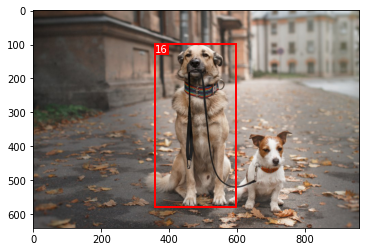

In [70]:
from matplotlib import patches
import matplotlib.pyplot as plt
from pytorchyolo.utils.utils import load_classes, rescale_boxes, non_max_suppression, print_environment_info
import random

img_size = 300

plt.figure()
fig, ax = plt.subplots(1)
ax.imshow(img)
# Rescale boxes to original image
# boxes = rescale_boxes(boxes, img_size, img.shape[:2])
unique_labels = np.unique(detections[:, -1])
n_cls_preds = len(unique_labels)
# Bounding-box colors
cmap = plt.get_cmap("tab20b")
colors = [cmap(i) for i in np.linspace(0, 1, n_cls_preds)]
bbox_colors = random.sample(colors, n_cls_preds)


x1 = boxes[0][0]
x2 = boxes[0][2]

y1 = boxes[0][1]
y2 = boxes[0][3]

cls_pred = boxes[0][-1]


box_w = x2 - x1
box_h = y2 - y1

print(box_h, box_w)

# Create a Rectangle patch
bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2, edgecolor="red", facecolor="none")
# Add the bbox to the plot
ax.add_patch(bbox)
print(bbox)
# Add label
plt.text(
    x1,
    y1,
    s=int(cls_pred),
    color="white",
    verticalalignment="top",
    bbox={"color": "red", "pad": 0}
)

# Save generated image with detections

In [1]:
import cv2

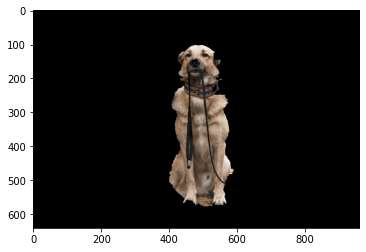

In [16]:
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (359,99,238,478) # format : x,y,w,h and only int numbers
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
plt.imshow(img*mask2[:,:,np.newaxis]) 
plt.show()

In [244]:
def get_avarage_color(img,mask):
    reduced_img = img*mask[:,:,np.newaxis]
    avarage_color = [0,0,0]
    k = mask.size/len(mask[mask==1])
    for i in range(3):
        avarage_color[i] = np.mean(reduced_img[:,:,i])*k
    return tuple(avarage_color)
        

In [256]:
def get_max_color(img,mask,N = 50):
    reduced_img = img*mask[:,:,np.newaxis]
    color = [0,0,0]
    for i in range(3):
        dis = np.histogram(reduced_img[:,:,i][mask!=0],bins = N)
        color_arg = np.argmax(dis[0])
        color[i] = dis[1][color_arg]
    
    return tuple(color)

In [257]:
get_avarage_color(img,mask2)

(130.85610070090115, 110.51167373925206, 94.53653109553554)

In [258]:
get_max_color(img,mask2,500)

(149.94, 114.544, 96.53)

In [243]:
import webcolors

In [66]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

In [67]:
def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
    return closest_name


In [259]:
get_colour_name(get_max_color(img,mask2,500))

'gray'

In [261]:
file = open('colors.txt','r',encoding="utf-8")
reduced_file = []
Dict = dict()
flag = 0
for line in file:
    if line == "\t\t<tr>\n":
        flag = 3
    if flag > 0 and line!='\t\t  \n' and line != "\t\t<tr>\n" :
        reduced_file.append(line)
    flag = flag - 1
for i in range(int(len(reduced_file)/2)):
    ru = reduced_file[2*i][45:-13]
    en = reduced_file[2*i+1][45:-13].replace(' ', '').replace('(*)','')
    Dict[en.lower()] = ru.lower()
print(Dict)

{'snow': 'белоснежный', 'ghostwhite': 'призрачно-белый', 'antiquewhite': 'белый-антик', 'cream': 'кремовый', 'peachpuff': 'персиковый', 'navajowhite': 'белый-навахо', 'cornsilk': 'шелковый оттенок', 'ivory': 'слоновая кость', 'lemonchiffon': 'лимонный', 'seashell': 'морская раковина', 'honeydew': 'медовый', 'azure': 'лазурный', 'lavender': 'бледно-лиловый', 'lavenderblush': 'голубой с красным отливом', 'mistyrose': 'тускло-розовый', 'white': 'белый', 'black': 'черный', 'dimgray': 'тускло-серый', 'slategray': 'синевато-серый', 'lightslategray': 'грифельно-серый', 'gray': 'серый', 'lightgray': 'светло-серый', 'mediumgray': 'серый нейтральный', 'darkgray': 'темно-серый', 'midnightblue': 'полуночно-синий', 'navy,darkblue': 'темно-синий', 'cornflower': 'васильковый', 'slateblue': 'грифельно-синий', 'lightslateblue': 'светлый грифельно-синий', 'royalblue': 'голубой королевский', 'blue': 'синий', 'skyblue': 'небесно-голубой', 'lightskyblue': 'небесно-голубой светлый', 'steelblue': 'синий со с

In [260]:
Ru = Dict[get_colour_name(get_max_color(img,mask2,500))]
Ru

'серый'